importing the libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

Importing dataset

In [2]:
df = pd.read_csv("water_potability.csv")
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [3]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [4]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

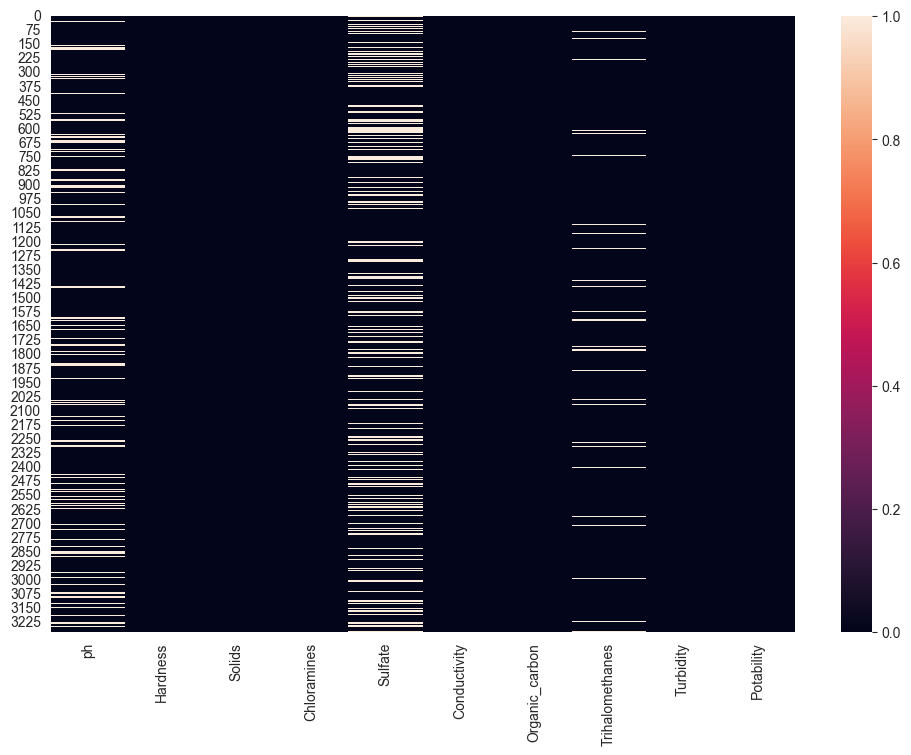

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull())

Data Visualization

<Axes: >

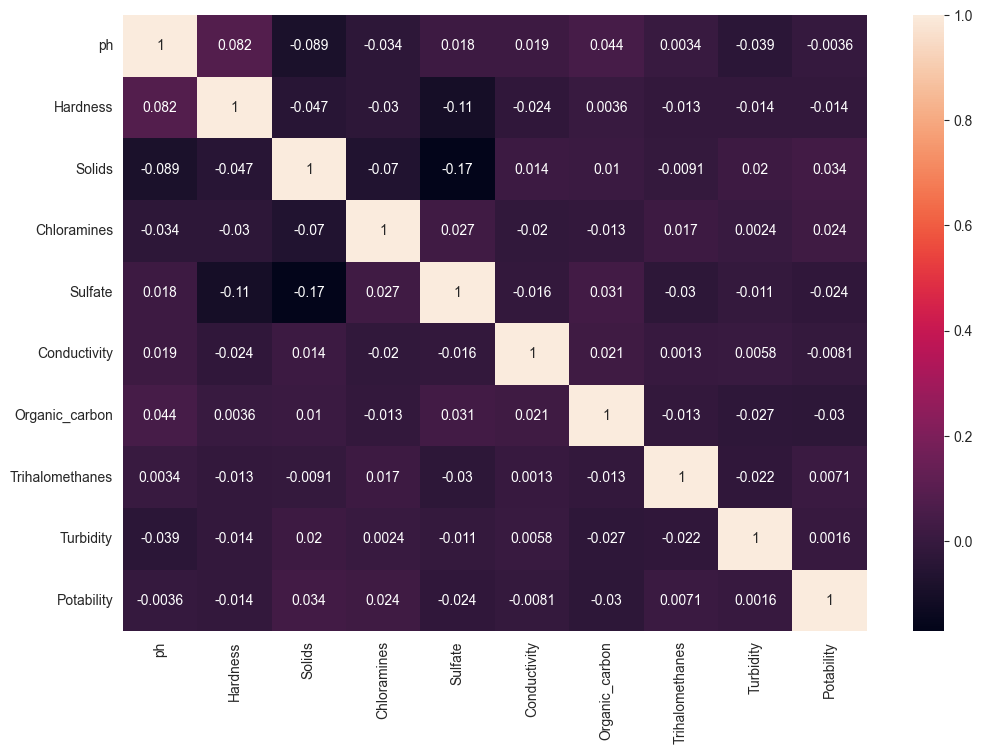

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='Potability', ylabel='count'>

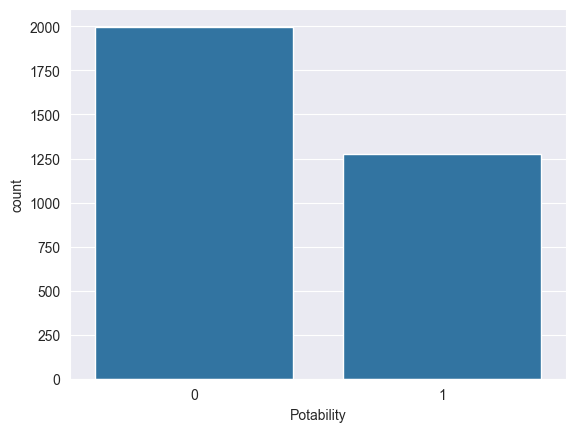

In [9]:
sns.countplot(x="Potability", data=df)

In [10]:
df["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

Visualization of dataset also checking for outliers

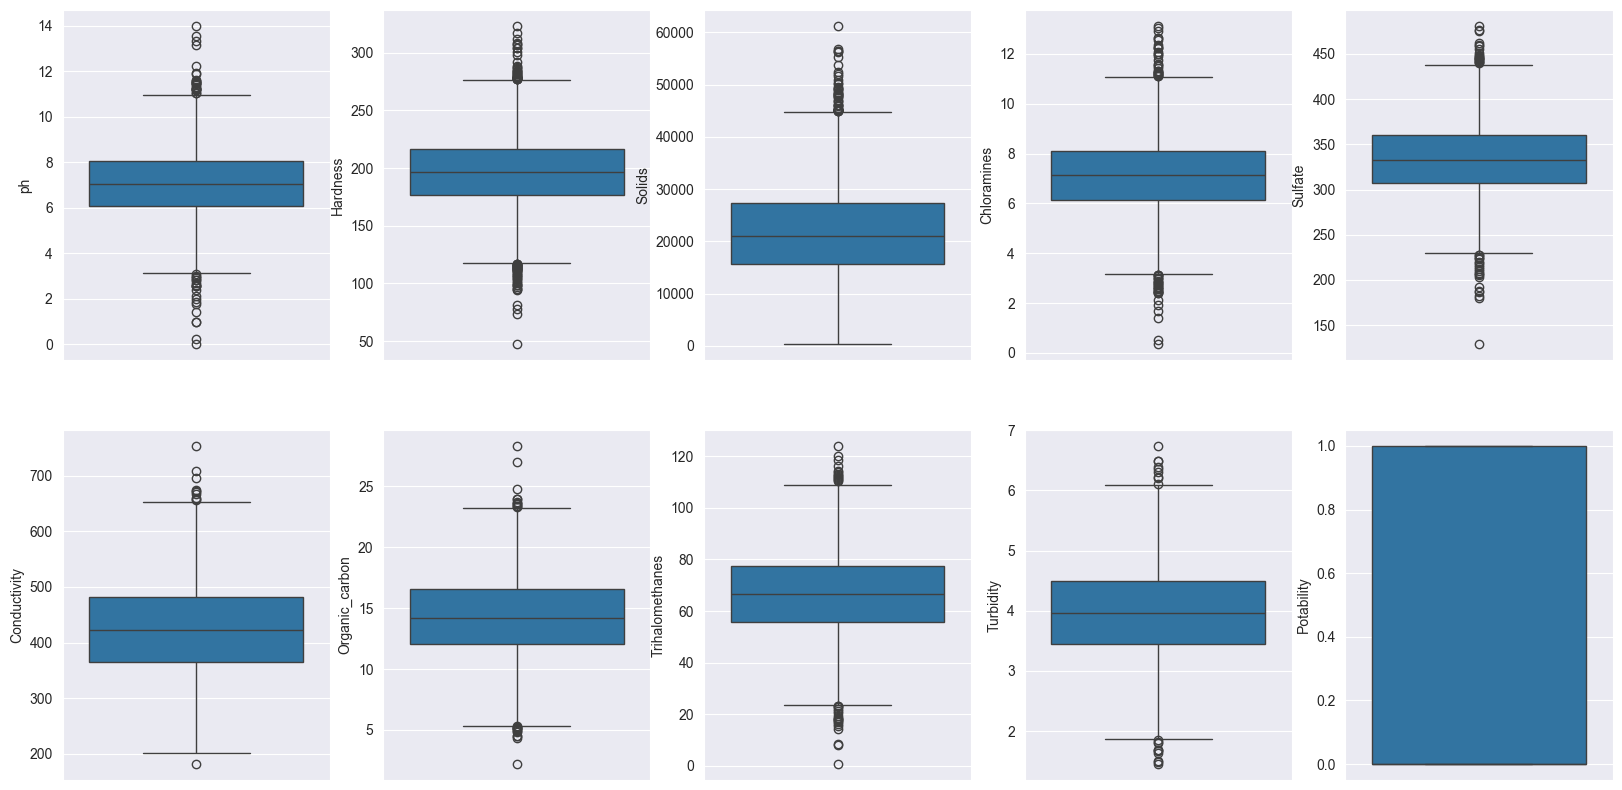

In [11]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize = (20,10))
ax = ax.flatten()
index = 0
for col, value in df.items():
    sns.boxplot(y=col, data= df, ax=ax[index])
    index = index+1

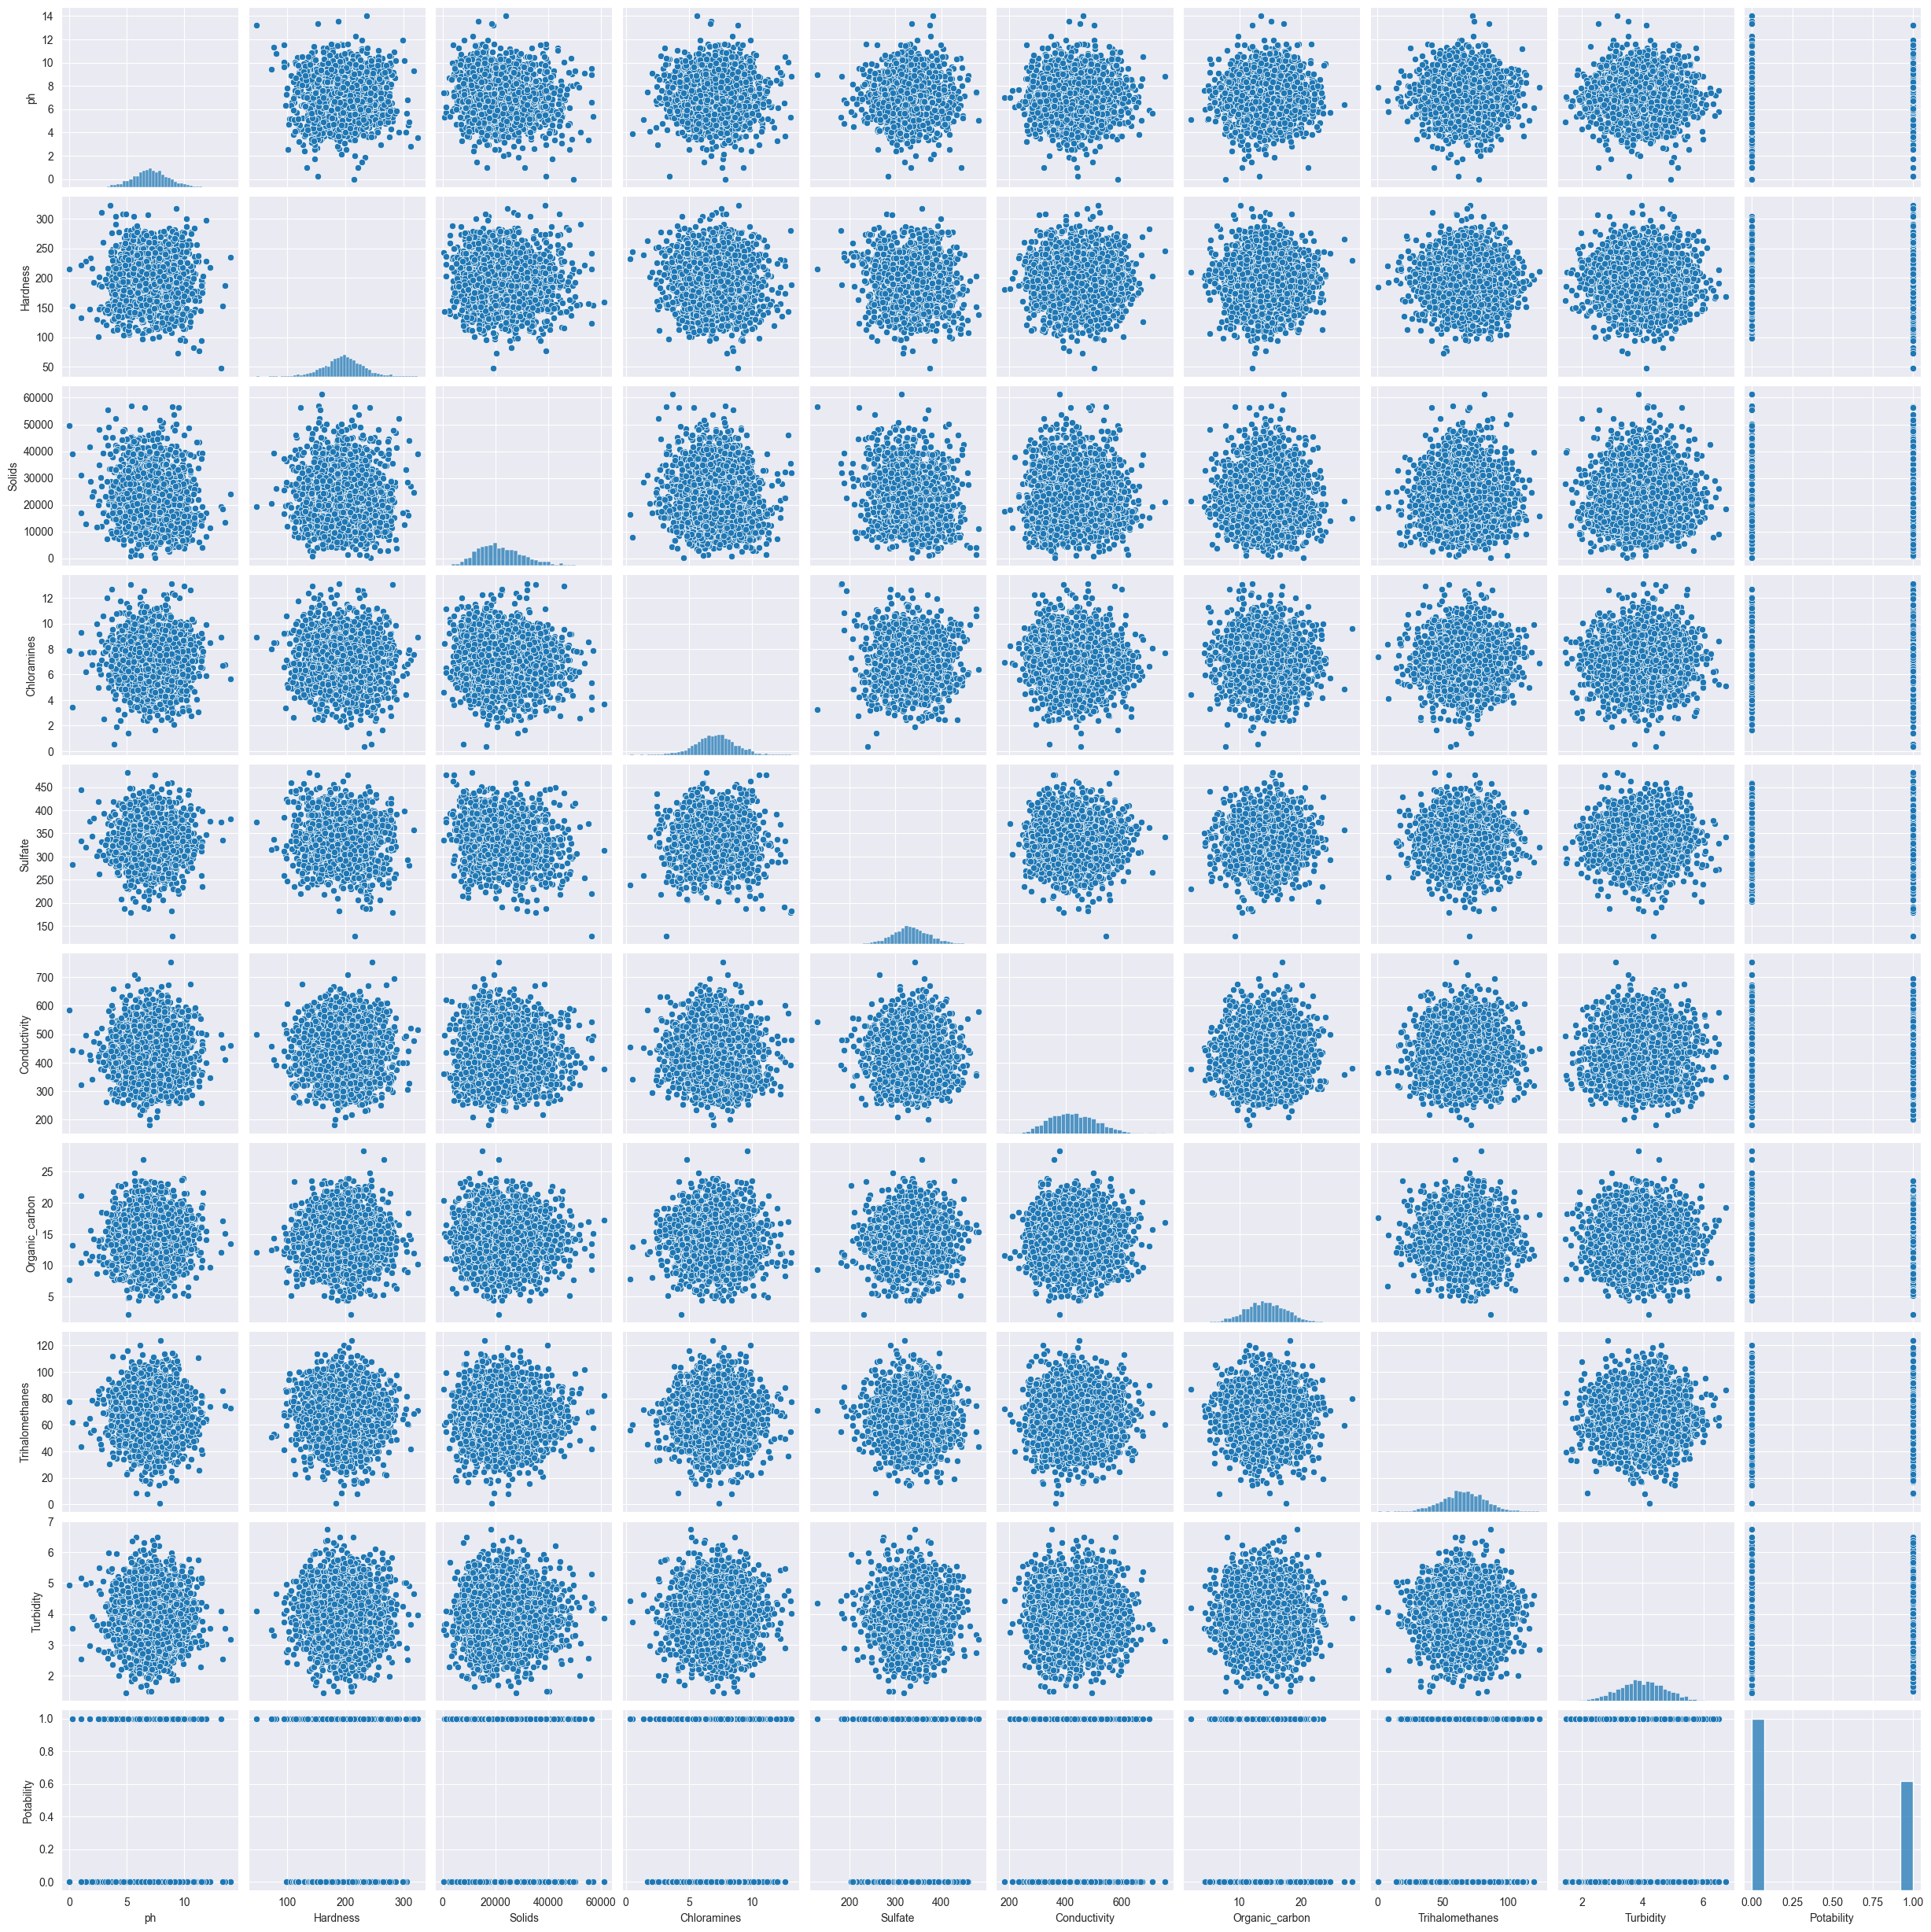

In [12]:
sns.pairplot(df)

In [13]:
fig = px.pie(df, names = "Potability", hole=0.4, template="plotly_dark")
fig.show()

In [14]:
fig = px.scatter(df, x = "ph", y="Sulfate",color="Potability", template="plotly_dark")
fig.show()

In [15]:
fig = px.scatter(df, x = "Organic_carbon", y="Hardness",color="Potability", template="plotly_dark")
fig.show()

finding the missing value

Text(0, 0.5, 'Percetage of missing values')

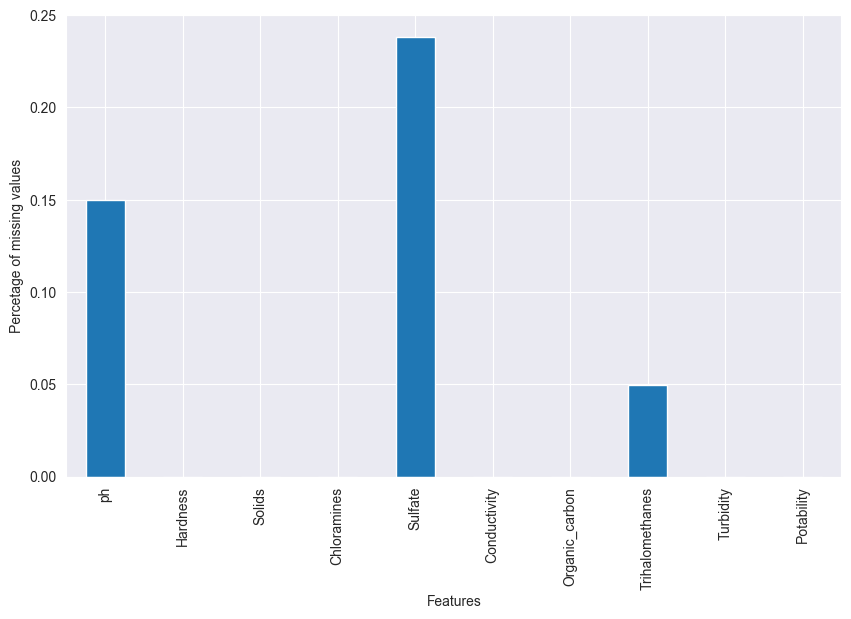

In [16]:
df.isnull().mean().plot.bar(figsize = (10, 6))
plt.xlabel("Features")
plt.ylabel("Percetage of missing values")

In [17]:
df["ph"] = df["ph"].fillna(df["ph"].mean())
df["Sulfate"] = df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

In [18]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<Axes: >

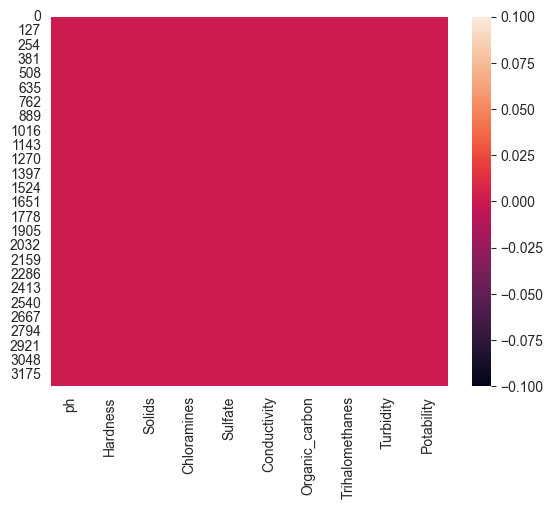

In [19]:
sns.heatmap(df.isnull())

In [20]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

Data Preprocessing

In [21]:
x = df.drop("Potability", axis=1)
y = df["Potability"]

In [22]:
x.shape, y.shape

((3276, 9), (3276,))

In [23]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x)

[[-6.04313345e-16  2.59194711e-01 -1.39470871e-01 ... -1.18065057e+00
   1.30614943e+00 -1.28629758e+00]
 [-2.28933938e+00 -2.03641367e+00 -3.85986650e-01 ...  2.70597240e-01
  -6.38479983e-01  6.84217891e-01]
 [ 6.92867789e-01  8.47664833e-01 -2.40047337e-01 ...  7.81116857e-01
   1.50940884e-03 -1.16736546e+00]
 ...
 [ 1.59125368e+00 -6.26829230e-01  1.27080989e+00 ... -9.81329234e-01
   2.18748247e-01 -8.56006782e-01]
 [-1.32951593e+00  1.04135450e+00 -1.14405809e+00 ... -9.42063817e-01
   7.03468419e-01  9.50797383e-01]
 [ 5.40150905e-01 -3.85462310e-02 -5.25811937e-01 ...  5.60940070e-01
   7.80223466e-01 -2.12445866e+00]]


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [25]:
x_train.shape, x_test.shape

((2620, 9), (656, 9))

Using Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

Training of the model

In [28]:
model_lr.fit(x_train, y_train)

LogisticRegression()

Making Prediction

In [30]:
pred_lr = model_lr.predict(x_test)
print(pred_lr)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

Accuracy score of logistic regression

In [43]:
accuracy_score_lg = accuracy_score(y_test, pred_lr)
print(accuracy_score_lg*100)

59.60365853658537


Decision Tree Classifiers Creating the Model

In [34]:
model_dt = DecisionTreeClassifier(max_depth=4)
#Training of decision Tree
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

Making Prediction using Decision Tree

In [42]:
pred_dt = model_dt.predict(x_test)
accuracy_score_lg_dt = accuracy_score(y_test, pred_dt)
print(accuracy_score_lg_dt*100)

62.80487804878049


Confusion Matrix

In [37]:
cn2 = confusion_matrix(y_test, pred_dt)
print(cn2)
# sns.heatmap(cn2/np)

[[352  39]
 [205  60]]


Making Predicition Using Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
#train the Model
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [41]:
#making The Predicition
pred_rf = model_rf.predict(x_test)
accuracy_score_rf = accuracy_score(y_test, pred_rf)
print(accuracy_score_rf*100)

67.3780487804878


In [44]:
cn3 = confusion_matrix(y_test, pred_rf)
print(cn3)

[[343  48]
 [166  99]]


KNN(K-nearest-neighbour) 

In [45]:
from sklearn.neighbors import KNeighborsClassifier
#creating Model Object
model_knn = KNeighborsClassifier()

In [55]:
model_knn = KNeighborsClassifier(n_neighbors=9)
model_knn.fit(x_train, y_train)
pred_knn = model_knn.predict(x_test)
accuracy_score_knn = accuracy_score(y_test, pred_knn)
print(accuracy_score_knn*100)

62.95731707317073


SVM(Suport Vector Machine)

In [61]:
from sklearn.svm import SVC
model_svm = SVC(kernel="rbf")
model_svm.fit(x_train, y_train)

SVC()

In [62]:
pred_svm = model_svm.predict(x_test)
accuracy_score_svm = accuracy_score(y_test, pred_svm)
print(accuracy_score_svm*100)

69.35975609756098


ADABOOSTING Classifier

In [63]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(n_estimators=100)
#training the Model
model_ada.fit(x_train, y_train)

E:\python\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoostClassifier(n_estimators=100)

In [65]:
#making the prediction
pred_ada = model_ada.predict(x_test)
accuracy_score_ada = accuracy_score(y_test, pred_ada)
print(accuracy_score_ada*100)

59.60365853658537


XGBoost Classifier

In [68]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_estimators = 200, learning_rate = 0.04)
#training model 
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [69]:
pred_xgb = model_xgb.predict(x_test)
accuracy_score_xgb = accuracy_score(y_test, pred_xgb)
print(accuracy_score_xgb*100)

67.83536585365853


Accuracy Visualization

In [71]:
models = pd.DataFrame({
    "Model" : ["Logistic Regression",
               "Decision Tree",
               "Random Forest",
               "KNN",
               "SVM",
               "AdaBoost",
               "XGBoosT"],
    "Accuracy Score" : [accuracy_score_lg, accuracy_score_lg_dt, accuracy_score_rf, accuracy_score_knn,
                        accuracy_score_svm, accuracy_score_ada, accuracy_score_xgb]
})

In [72]:
print(models)

                 Model  Accuracy Score
0  Logistic Regression        0.596037
1        Decision Tree        0.628049
2        Random Forest        0.673780
3                  KNN        0.629573
4                  SVM        0.693598
5             AdaBoost        0.596037
6              XGBoosT        0.678354


Model  Accuracy Score
4                  SVM        0.693598
6              XGBoosT        0.678354
2        Random Forest        0.673780
3                  KNN        0.629573
1        Decision Tree        0.628049
0  Logistic Regression        0.596037
5             AdaBoost        0.596037

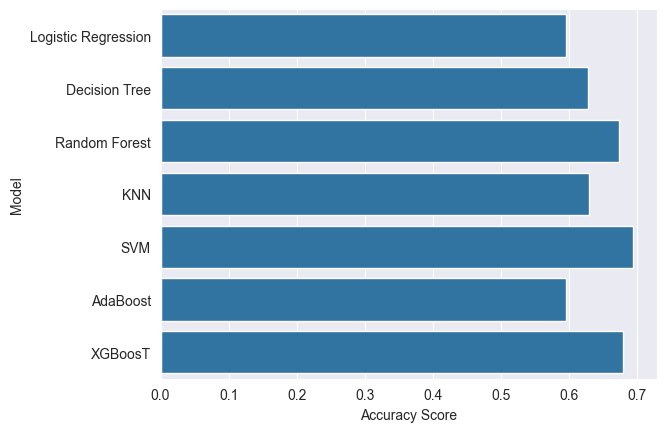

In [73]:
sns.barplot(x="Accuracy Score", y="Model", data=models)
models.sort_values(by="Accuracy Score", ascending=False)